<a href="https://colab.research.google.com/github/mubarak23k/mubarak23k/blob/main/Titanic%20Data%20Using%20pandas%20and%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
# for exploratory data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# utils
import warnings 
warnings.filterwarnings('ignore')


# **Importing the data**

We begin by importing the training and testing datasets into Pandas DataFrames. Then combine these datasets for analyzing both datasets.

In [185]:
from google.colab import files
file = files.upload()

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
both = [df_train, df_test]


Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


# Analyze by describing data

We will do summary statistics to have a general overview of the data. We first take a look at the number of columns for each data and then the head and tail, determine which column feature is categorical or numerical or continuous. Then check for blank or missing values

In [186]:
print(df_train.columns.values)
print(df_test.columns.values)
df_train.head()


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [188]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Summary Statistics



In [189]:
df_train.info()
print("_" * 40)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

From the output above, the training dataset has 11 features [details can be found on Kaggle](https://www.kaggle.com/c/titanic/data?select=test.csv).


*   For training dataset, the fifth column (age) and the tenth column (cabin) have some missing values.

*   For the test data, the fourth (age), eigth (fare) and ninth (cabin) columns have missing values.

*   7 features are integer (2) or floats (5).

*   5 features are strings (object).


# Distribution of features

This is to have a look at the distribution of features, the mean, standard deviation, percentiles etc.



In [190]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
df_train.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taylor, Mr. Elmer Zebley",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


# Observation
* Cabin has 147 unique values, meaning there are many duplicates or perhaps individuals shared a cabin.
* Ticket also has 681 unique values, meaning there are duplicates.

# Distribution Surival rate using pie chart


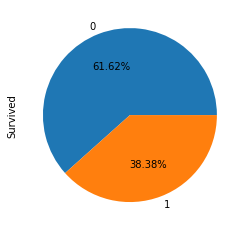

In [192]:
df_train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')


# Distribution of male and female that survived.
Females had a 74.2% likelyhood of surviving while males had 18.89% chance of surviving.

# Implication
* Add Sex feature to model training.

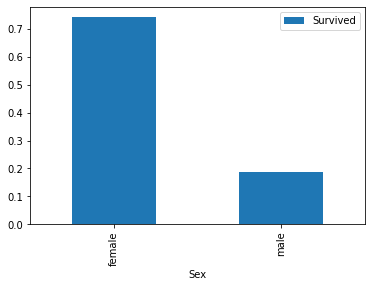

In [193]:
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()


In [194]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


# Distribution of survival rate based on ticket (and socioeconomic) class

* 1 = first/upper class
* 2 = second/middle class 
* 3 = third/lower class.

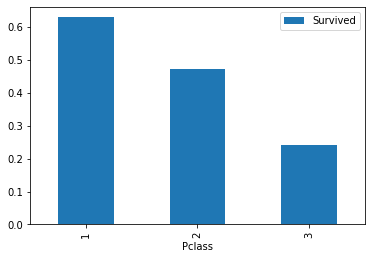

In [195]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()


In [196]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Observation
Passengers in the upper class of society over 60% chance of surviving, middle class had alittle over 47% chance of survival and then those in the lower class had the least, i.e., 24.23%, chance of survival.

# Implication
Pclass should be considered for model training.

# Family Size (Parent & child) and (Sibling & Spouse)

Passengers with a family size between 2-4 had a better chance to survive.

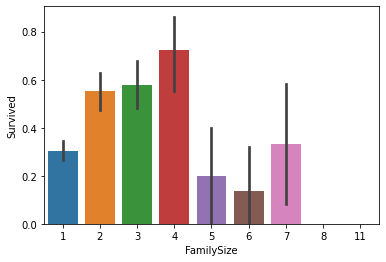

In [197]:
df_train['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1 
df_test['FamilySize'] = df_test['Parch'] + df_test['SibSp'] + 1 

sns.barplot(data=df_train, x='FamilySize', y='Survived');


# Distribution of survival based on Age

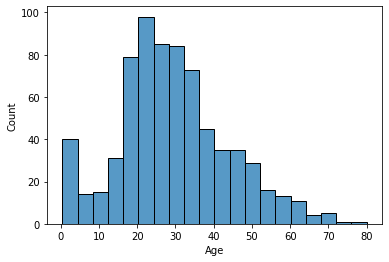

In [198]:
age_surv = df_train[df_train['Age'].notna()][['Age', 'Survived']]
sns.histplot(age_surv['Age']);


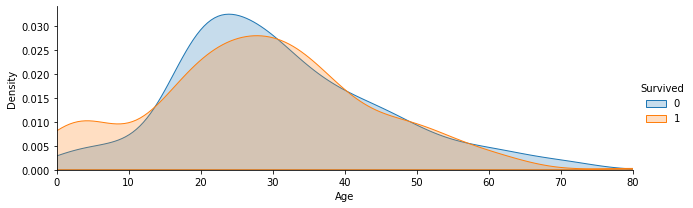

In [199]:
agenormal = sns.FacetGrid(df_train, hue='Survived', aspect=3)
agenormal.map(sns.kdeplot, 'Age', shade=True)
agenormal.set(xlim=(0, df_train['Age'].max()))
agenormal.add_legend()


# Observation
* Passengers under 10years had high survival rate.
* Passengers around 80years survived.
* Most passengers between 15 to 25year did not survive.

# Implication
* This implies we should consider Age  in our model training.
* Complete the Age feature for null values.
* We should band age in groups.

# Survival rate based on Sex and Port of Embarkation

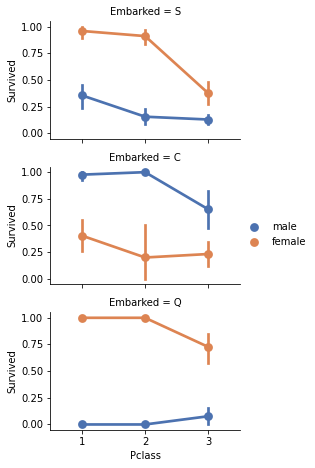

In [200]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


# Observations.

* Generally, females had much better survival rate than males. 
* Males had higher survival rate at Embarked=C . 
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. 
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. 

# Implication
* Add Embarked feature to model training.

# Cabin
* The details of the cabin shows the deck the passengers were situated, and it might have an effect on their survival. 
* It has missing values which will be replaced by “Unknown”.

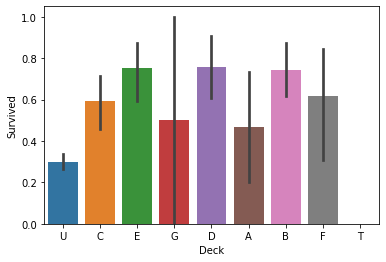

In [201]:
df_train['Cabin'] = df_train['Cabin'].fillna('Unknown')
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')
# Cabin 
df_train['Deck'] = df_train['Cabin'].map(lambda x:x[0])
df_test['Deck'] = df_test['Cabin'].map(lambda x:x[0])
sns.barplot(data = df_train, x='Deck', y='Survived')


Observation
* Passengers in deck E, D & B have a higher survival rate. 
* Passengers in deck U had the lowest survival rate.

# Data Wrangling
* Based on the data visualization, we can drop some of the columns.
*  From the observations above and it implication, the Cabin and Ticket features will be dropped.

In [202]:
print("Before", df_train.shape, df_test.shape, both[0].shape, both[1].shape)

df_train = df_train.drop(['Ticket', 'Cabin', 'Deck'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin', 'Deck'], axis=1)
both = [df_train, df_test]

"After", df_train.shape, df_test.shape, both[0].shape, both[1].shape


Before (891, 14) (418, 13) (891, 14) (418, 13)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

# Distribution of Survival based on title.
* Extracting the titles of passengers from their names will show their social class. 

In [203]:
# Extract titles
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Mme           1
Don           1
Sir           1
Capt          1
Lady          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [204]:
# Banding the title of the passengers into six groups
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
df_train['Title'] = df_train['Title'].map(Title_Dictionary)
df_test['Title'] = df_test['Title'].map(Title_Dictionary)
df_train['Title'].value_counts()


Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [205]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Officer": 5, "Royalty": 6}
for dataset in both:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


* Name and PassengerId columns will also be dropped from the training dataset.
* PassengerId might be needed in the test set so it will be maintained.

In [206]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
both = [df_train, df_test]
df_train.shape, df_test.shape


((891, 10), (418, 10))

# Convert string to numerical features

* Convert sex to a new feature where female=1 and male=0.

In [207]:
for dataset in both:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,S,2,1
1,1,1,1,38.0,1,0,71.2833,C,2,3
2,1,3,1,26.0,0,0,7.9250,S,1,2
3,1,1,1,35.0,1,0,53.1000,S,2,3
4,0,3,0,35.0,0,0,8.0500,S,1,1


# Completing a numerical continuous feature

* Estimate and complete features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.



1.   Generate random numbers between mean and standard deviation.
2.   Using correlated feautures to guess missing values is more accurate. From above, Age, Sex and Pclass were correlated so age can be guessed using mean/median values of Age accross a combination of these features. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
3.   Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.


"Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2."

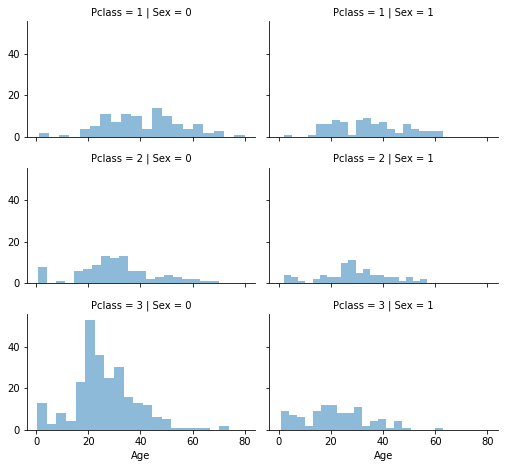

In [208]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()


In [209]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [210]:
# Iterating over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

for dataset in both:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22,1,0,7.2500,S,2,1
1,1,1,1,38,1,0,71.2833,C,2,3
2,1,3,1,26,0,0,7.9250,S,1,2
3,1,1,1,35,1,0,53.1000,S,2,3
4,0,3,0,35,0,0,8.0500,S,1,1


In [211]:
# Banding age to check its correlation with Survival rate
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [212]:
# Replace Age with ordinals based on these bands.

for dataset in both:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,2,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,2,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,1,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,2,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,1,"(32.0, 48.0]"


In [213]:
# Remove Ageband
df_train = df_train.drop(['AgeBand'], axis=1)
both = [df_train, df_test]
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,1,1,0,7.2500,S,2,1
1,1,1,1,2,1,0,71.2833,C,2,3
2,1,3,1,1,0,0,7.9250,S,1,2
3,1,1,1,2,1,0,53.1000,S,2,3
4,0,3,0,2,0,0,8.0500,S,1,1


In [214]:
# combine the two features below into one names familysize
for dataset in both:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [215]:
# create a feature Alone for a passenger without any relative on board.
for dataset in both:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1

df_train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()


,Alone,Survived
0,0,0.505650
1,1,0.303538


In [216]:
# Dropping Parch & Sibsp and leave Alone feature
df_train = df_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [df_train, df_test]

df_train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [217]:
most_embark = df_train.Embarked.dropna().mode()[0]      
most_embark


'S'

In [218]:
for dataset in both:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_embark)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# Convert categorical to numeric feature

Convert the Embarked feature by creating a new numeric Port feature.

In [219]:
embark_map = {"C": 0, "Q": 1, "S": 2}
for dataset in both:
    dataset['Embarked'] = dataset['Embarked'].map(embark_map)
    dataset['Embarked'] = dataset['Embarked'].fillna(0).astype(int)

df_train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Fill the empty rows for the fare with the median of fares in the test dataset

In [220]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)
df_test.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,0,2,7.8292,Q,1,1
1,893,3,1,2,7.0000,S,3,0
2,894,2,0,3,9.6875,Q,1,1
3,895,3,0,1,8.6625,S,1,1
4,896,3,1,1,12.2875,S,3,0


In [221]:
# Take a look at a band of fare and survived
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [222]:
# Convert the Fare feature to ordinal values based on the FareBand.

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train = df_train.drop(['FareBand'], axis=1)
both = [df_train, df_test]
    
df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,0,S,1,0
1,1,1,1,2,3,C,3,0
2,1,3,1,1,1,S,2,1
3,1,1,1,2,3,S,3,0
4,0,3,0,2,1,S,1,1
5,0,3,0,1,1,Q,1,1
6,0,1,0,3,3,S,1,1
7,0,3,0,0,2,S,4,0
8,1,3,1,1,1,S,3,0
9,1,2,1,0,2,C,3,0


In [223]:
df_test.head(10)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,892,3,0,2,0,Q,1,1
1,893,3,1,2,0,S,3,0
2,894,2,0,3,1,Q,1,1
3,895,3,0,1,1,S,1,1
4,896,3,1,1,1,S,3,0
5,897,3,0,0,1,S,1,1
6,898,3,1,1,0,Q,2,1
7,899,2,0,1,2,S,1,0
8,900,3,1,1,0,C,3,1
9,901,3,0,1,2,S,1,0


In [224]:
embark_map = {"C": 0, "Q": 1, "S": 2}
for dataset in both:
    dataset['Embarked'] = dataset['Embarked'].map(embark_map)
    dataset['Embarked'] = dataset['Embarked'].fillna(0).astype(int)

df_train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,0,1,0,2,1,0
1,1,1,1,2,3,0,3,0
2,1,3,1,1,1,2,2,1
3,1,1,1,2,3,2,3,0
4,0,3,0,2,1,2,1,1


# Ready to create a model and make predictions 

In [225]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_test = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 7), (891,), (418, 7))

In [226]:
# Logistic Regression

logR = LogisticRegression()
logR.fit(X_train, Y_train)
Y_pred = logR.predict(X_test)
acc_log = round(logR.score(X_train, Y_train) * 100, 2)
acc_log

79.35

In [228]:
coeff = pd.DataFrame(df_train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logR.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.177176
5,Title,0.408262
6,Alone,0.063639
2,Age,-0.032423
3,Fare,-0.062703
4,Embarked,-0.308570
0,Pclass,-0.960497


In [232]:
# K-Nearest Neighbourhood

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


84.4

In [229]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


86.76

In [230]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

# Create the model using the keras with tensorflow

In [233]:
# MODEL
# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(12, activation="relu"),
                             tf.keras.layers.Dense(8, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])


In [234]:
# 2. Compile the Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


In [235]:
# 3. Fit the Model
history = model.fit(X_train, Y_train, epochs = 100)


Epoch 1/100
28/28 [==============================] - 1s 1ms/step - loss: 0.6755 - accuracy: 0.6453
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.7901
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.8047
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7957
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8182
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8126
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.8081
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8204
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8159
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8272
Epoch 11/

An accuracy of 83.16%

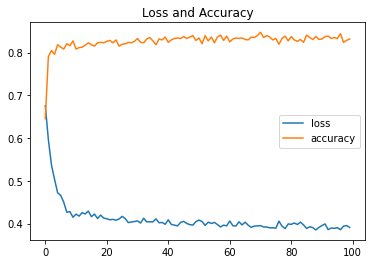

In [236]:
# Plotting the Loss and Accuracy over 100 epochs
pd.DataFrame(history.history).plot(title="Loss and Accuracy")


Lets make some predictions using the X_test

In [237]:
Y_probs = model.predict(X_test) # probs is prediction probabilities

# Converting all prediction probabilities to integers
y_preds = Y_probs.round()


In [239]:
# We now have the predictions on the test data

final_pred = pd.DataFrame(data=X_test, columns=["X_test"])
final_pred["Survived"] = y_preds.astype(int)


# Final Analysis
* As discussed in the write up, females had a higher survival rate than men. 
* The elderly (80+ years) and kids below 10years had a higher survival rate in general. 
* Individuals between 15-25 had the lowest survival rate
* The cream of crop of society had a survival rate of 60%, I think it's because they had a first class ticket which comes with life jacket.
* Port of embarkation also has a role, passengers who embarked at the C = Cherbourg, had a higher survival rate than those who embarked at Q = Queenstown & S = Southampton.


# REFERENCES

1. [Titanic Data Science Solution on Kaggle](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
2. [For some of the visualization](https://sulibo.github.io/articles/2020-11/kaggle-titanic-competition-with-deep-neural-network-using-keras)
3. [Tensorflow homepage for model prediction](https://www.tensorflow.org/tutorials/load_data/csv)
4. [A tutorial from Medium](https://chauhanswapnil.medium.com/titanic-disaster-neural-network-using-tensorflow-and-google-colab-and-uploading-it-to-kaggle-464bb330d11e)
